In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("book_sales.csv", index_col='Date', parse_dates=['Date'], usecols=['Date','Hardcover'])

In [158]:
df.index = df.index.date
df['Time'] = np.arange(len(df.index))

In [159]:
df.head()

,Hardcover,Time
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


Text(0, 0.5, 'Hardcover Sales')

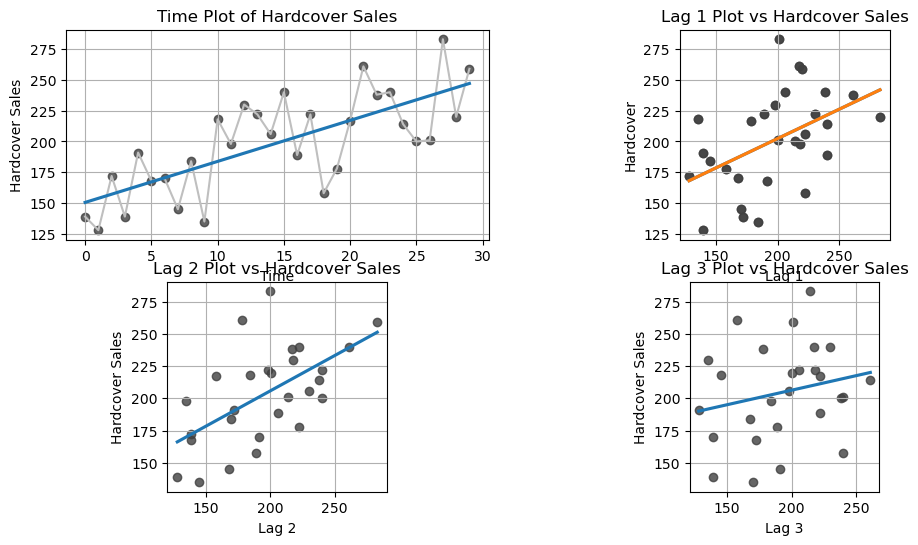

In [172]:
# Create the figure and axes
fig, ax = plt.subplots(2,2, figsize = (12, 6))

# FIRST PLOT 
# This is the line plot of overall trend. 
# Connects all actual data points with zigzag lines
ax[0,0].plot(df['Time'], df['Hardcover'], color='0.75')

# This is the scatter plot with regression, showing actual data points and 
# regression line (best fit)
sns.regplot(x='Time', y='Hardcover', ci = None, data=df, ax=ax[0,0], scatter_kws= dict(color='0.25'))
ax[0,0].grid(True)

# Add labels and title
ax[0,0].set_title("Time Plot of Hardcover Sales")
ax[0,0].set_xlabel("Time")
ax[0,0].set_ylabel("Hardcover Sales")

##
df['Lag 1'] = df['Hardcover'].shift(1)
df['Lag 2'] = df['Hardcover'].shift(2)
df['Lag 3'] = df['Hardcover'].shift(3)

ax[0,1] = sns.regplot(x='Lag 1', y='Hardcover', ci=None, 
                 data=df, ax=ax[0,1], scatter_kws=dict(color='0.25'))
ax[0,1].grid(True)
ax[0,1].set_aspect('equal', adjustable='box') # makes scale of x and y axes equal
ax[0,1].set_title("Lag 1 Plot vs Hardcover Sales")

ax[0,1] = sns.regplot(x='Lag 1', y='Hardcover', ci=None, 
                 data=df, ax=ax[0,1], scatter_kws=dict(color='0.25'))
ax[0,1].grid(True)
ax[0,1].set_aspect('equal', adjustable='box') # makes scale of x and y axes equal
ax[0,1].set_title("Lag 1 Plot vs Hardcover Sales")

# THIRD PLOT (bottom-left: ax[1,0]) Lag 2
sns.regplot(x='Lag 2', y='Hardcover', ci=None, data=df, ax=ax[1, 0], scatter_kws=dict(color='0.25'))
ax[1, 0].grid(True)
ax[1, 0].set_aspect('equal', adjustable='box')
ax[1, 0].set_title("Lag 2 Plot vs Hardcover Sales")
ax[1, 0].set_xlabel("Lag 2")
ax[1, 0].set_ylabel("Hardcover Sales")

# FOURTH PLOT (bottom-right: ax[1,1]) Lag 3 or Lag 4 (I’ll use Lag 3 here, you can swap)
sns.regplot(x='Lag 3', y='Hardcover', ci=None, data=df, ax=ax[1, 1], scatter_kws=dict(color='0.25'))
ax[1, 1].grid(True)
ax[1, 1].set_aspect('equal', adjustable='box')
ax[1, 1].set_title("Lag 3 Plot vs Hardcover Sales")
ax[1, 1].set_xlabel("Lag 3")
ax[1, 1].set_ylabel("Hardcover Sales")


In [173]:
df.head()

,Hardcover,Time,Lag 1,Lag 2,Lag 3
2000-04-01,139,0,NaN,NaN,NaN
2000-04-02,128,1,1...,NaN,NaN
2000-04-03,172,2,1...,1...,NaN
2000-04-04,139,3,1...,1...,1...
2000-04-05,191,4,1...,1...,1...


target = weight * time + bias
target = weight * lag + bias (y intercept)